In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from time_depend import model,guide

In [2]:
def data_generator(length,cp,inc1,inc2):
    data = []
    mean = 0.0
    for i in range(length):
        if i < cp:
            data.append(np.random.normal(mean,0.1))
            mean += inc1
        else:
            data.append(np.random.normal(mean,0.1))
            mean += inc2
    return data

In [3]:
data1=data_generator(30,15,0.05,0.1)

In [4]:
adam = pyro.optim.Adam({"lr": 0.02}) 
elbo = pyro.infer.Trace_ELBO()
svi = pyro.infer.SVI(model, guide, adam, elbo)

In [5]:
from scipy.special import softmax
losses=[]
probs=[]
for step in range(50):  # Consider running for more steps.
    loss = svi.step(torch.tensor(data1))
    losses.append(loss)
    pi= pyro.param("pi").data.cpu().numpy()
    prob=softmax(pi)
    probs.append(prob)
        

ValueError: Error while computing log_prob at site 'tau':
Expected value argument (Tensor of shape ()) to be within the support (IntegerInterval(lower_bound=0, upper_bound=28)) of the distribution Categorical(probs: torch.Size([29])), but found invalid values:
29
Trace Shapes:  
 Param Sites:  
Sample Sites:  
 lambda1 dist |
        value |
     log_prob |
 lambda2 dist |
        value |
     log_prob |
     tau dist |
        value |

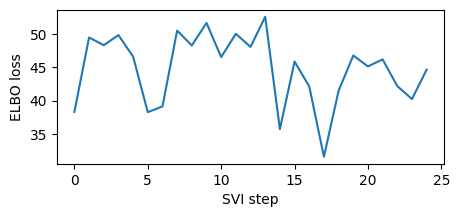

In [6]:
plt.figure(figsize=(5, 2))
plt.plot(losses[0:70])
plt.xlabel("SVI step")
plt.ylabel("ELBO loss");

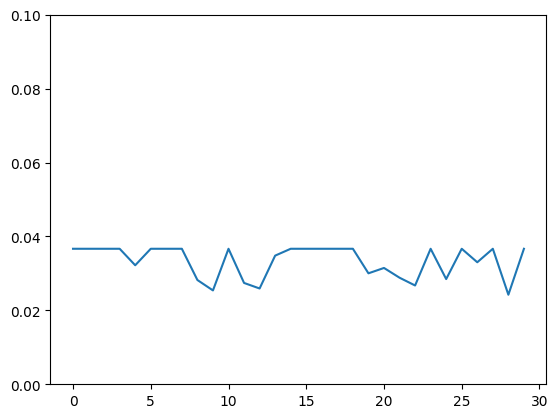

In [12]:
import matplotlib.pyplot as plt
plt.ylim(0.0,0.1)
plt.plot(probs[15])
plt.show()

In [13]:
a1=pyro.param("a1").data.cpu().numpy()
b1=pyro.param("b1").data.cpu().numpy()

In [14]:
print(a1,b1)

3.2212205232358198 3.397303052829334


In [15]:
a2=pyro.param("a2").data.cpu().numpy()
b2=pyro.param("b2").data.cpu().numpy()

In [16]:
print(a2,b2)

3.680613113255132 4.0001036416921165
